### - Bibliotekos

In [3]:
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

### - Failo pasirinkimo dalis

In [5]:
folder = "ivairus"
files = [f for f in os.listdir(folder) if f.endswith(".wav")]

if not files:
    print(f"Kataloge \"{folder}\" nėra \".wav\" formato failų.")
    exit()

print("Pasirinkite failą iš pateiktų įvesdami skaičių:")
for i, f in enumerate(files, start=1):
    print(f"{i}. {f}")

while True:
    choice = int(input(f"Jūsų pasirinkimas (1–{len(files)}): "))
    if 1 <= choice <= len(files):
        file_path = os.path.join(folder, files[choice-1])
        print("Pasirinktas failas:", file_path)
        break
    else:
        print("Nėra tokio pasirinkimo.")


Pasirinkite failą iš pateiktų įvesdami skaičių:
1. Angry_german.wav
2. applause.wav
3. Brown_noise.wav
4. city_traffic.wav
5. DTMF_tones.wav
6. Elephant.wav
7. Englishman.wav
8. Female_scream.wav
9. muffled-drum-kick.wav
10. Multitone.wav
11. Neutral_lithuanian.wav
12. oceanwave.wav
13. Opera-vocal_129bpm_F_minor.wav
14. Sinus_125Hz.wav
15. Sinus_500Hz.wav
16. Stereo_music.wav
17. Thrash_metal.wav
18. White_noise.wav
19. woman-ohhahhh.wav


Jūsų pasirinkimas (1–19):  2


Pasirinktas failas: ivairus\applause.wav


### - Duomenų išsaugojimas atmintyje

In [7]:
signal, samplerate = sf.read(file_path, always_2d=True)
channels = signal.shape[1]
numpy_bit_depth = signal.dtype.itemsize * 8

# Kiekvienam kanalui priskiriamas atskiras laikas
channel_times = [np.arange(signal.shape[0]) / samplerate for _ in range(channels)]
channel_units = ["s"] * channels
subtype_to_bits = {
    "PCM_U8": 8,
    "PCM_16": 16,
    "PCM_24": 24,
    "PCM_32": 32,
    "FLOAT": 32,
    "DOUBLE": 64,
}
info = sf.info(file_path)
print(info)
bit_depth = subtype_to_bits.get(info.subtype, None)

ivairus\applause.wav
samplerate: 44100 Hz
channels: 1
duration: 5.273 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]


### - Grafikų braižymas kiekvienam kanalui

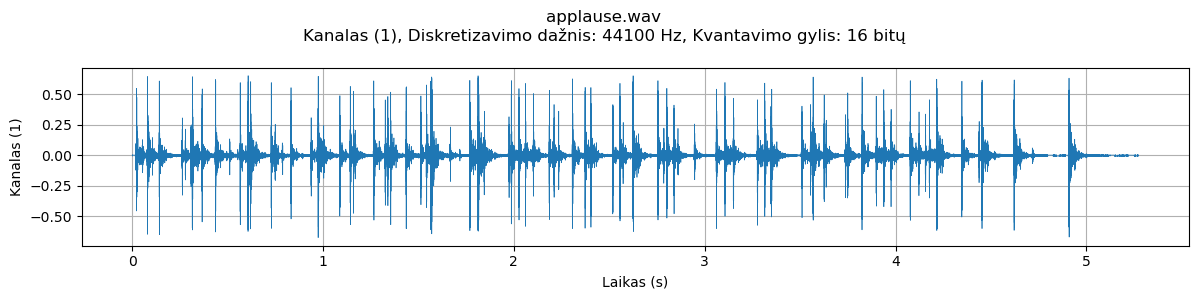

In [9]:
for ch in range(channels):
    time = channel_times[ch]
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(time, signal[:, ch], lw=0.5)
    ax.set_ylabel(f"Kanalas ({ch+1})")
    ax.set_xlabel("Laikas (s)")
    ax.grid(True)
    fig.suptitle(f"{os.path.basename(file_path)}\nKanalas ({ch+1}), "
                 f"Diskretizavimo dažnis: {samplerate} Hz, "
                 f"Kvantavimo gylis: {bit_depth} bitų")
    plt.tight_layout()
    plt.show()

### - Žymeklių atidėjimas kiekvienam kanalui

In [11]:
markers = []
for ch in range(channels):
    time = channel_times[ch]
    while True:
        m_time = float(input(f"Įveskite žymeklio laiką kanalui {ch+1} (0 ir {time[-1]:.3f}s): "))
        if 0 <= m_time <= time[-1]:
            break
        else:
            print(f"Įveskite reikšmę tarp 0 ir {time[-1]:.3f}s")
    # konvertuojam į mėginių indeksą
    m_sample = int(m_time * samplerate)
    m_sample = np.clip(m_sample, 0, signal.shape[0]-1)
    markers.append(m_sample)

# Piešiam grafikus su žymekliais
for ch in range(channels):
    time = channel_times[ch]
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(time, signal[:, ch], lw=0.5)
    ax.axvline(time[markers[ch]], color="r", linestyle="--", label="Markeris")
    ax.set_ylabel(f"Kanalas ({ch+1})")
    ax.set_xlabel("Laikas (s)")
    ax.grid(True)
    ax.legend()
    fig.suptitle(f"{os.path.basename(file_path)} – Kanalas ({ch+1}) su žymekliu")
    plt.tight_layout()
    plt.show()

Įveskite žymeklio laiką kanalui 1 (0 ir 5.273s):  a


ValueError: could not convert string to float: 'a'

### --- 6. Atkarpų atvaizdavimas kiekvienam kanalui

In [13]:
for ch in range(channels):
    time = channel_times[ch]
    print(f"Kanalas ({ch+1}):")

    while True:
        start_t = float(input("Įveskite atkarpos pradžią (s): "))
        if(start_t >= 0 and start_t < time[-1]):
            break
        else:
            print(f"Įveskite reikšmę nuo 0 iki {time[-1]:.3f}s")
   
    while True:
        end_t = float(input("Įveskite atkarpos pabaigą (s): "))
        if(end_t > start_t):
            break
        else:
            print(f"Įveskite reikšmę didesnę už {start_t}")


    start_s = int(start_t * samplerate)
    end_s = int(end_t * samplerate)
    start_s = np.clip(start_s, 0, signal.shape[0]-1)
    end_s = np.clip(end_s, 0, signal.shape[0])
    segment = signal[start_s:end_s, ch]
    seg_time = np.arange(len(segment)) / samplerate + start_t

    marker_time_segment = time[markers[ch]]

    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(seg_time, segment, lw=0.5)
    ax.set_ylabel(f"Kanalas ({ch+1})")
    ax.set_xlabel("Laikas (s)")
    ax.grid(True)

    # Žymeklis tik jei patenka į segmentą
    if start_t <= marker_time_segment <= end_t:
        ax.axvline(marker_time_segment, color="r", linestyle="--", label="Markeris")
        ax.legend()

    fig.suptitle(f"Kanalas ({ch+1}) – Atkarpa nuo {start_t:.3f} iki {end_t:.3f} s")
    plt.tight_layout()
    plt.show()

Kanalas (1):


Įveskite atkarpos pradžią (s):  a


ValueError: could not convert string to float: 'a'

### --- 7. Apskaičiuojama signalo energijos diagrama.

Kadrų ilgis: 1056.


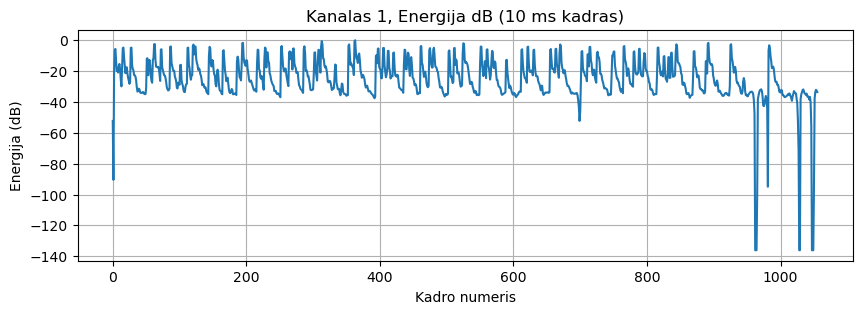

Kadrų ilgis: 527.


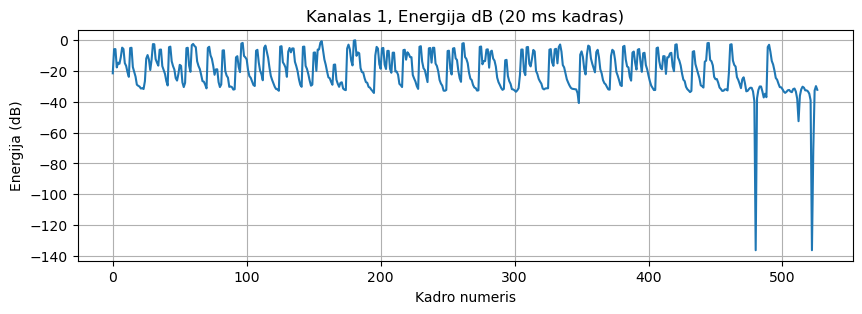

Kadrų ilgis: 350.


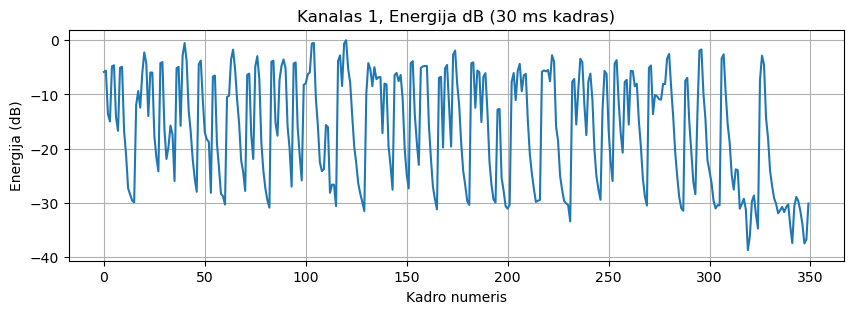

In [11]:
def frame_signal(x, fs, frame_ms, hop_ms=None):
    if hop_ms is None:
        hop_ms = frame_ms / 2.0
    N = int(round(frame_ms * fs / 1000.0))
    hop = int(round(hop_ms * fs / 1000.0))
    pad = (N - (len(x) - N) % hop) % hop
    if pad > 0:
        x = np.concatenate([x, np.zeros((pad,))])
    frames = []
    for start in range(0, len(x) - N + 1, hop):
        frames.append(x[start:start+N])
    return np.array(frames)

def frame_energy(frames):
    return np.sum(frames**2, axis=1)

def energy_to_dB(E):
    Emax = np.max(E)
    eps = 1e-12  # labai maža reikšmė, kad išvengtume log(0)
    return 10 * np.log10((E + eps) / (Emax + eps))

def plot_energy(Edb, ch, fl):
    plt.figure(figsize=(10,3))
    plt.plot(Edb)
    plt.title(f"Kanalas {ch+1}, Energija dB ({fl} ms kadras)")
    plt.xlabel("Kadro numeris")
    plt.ylabel("Energija (dB)")
    plt.grid(True)
    plt.show()


def plot_delta_energy(dE, ch, fl, k):
    plt.figure(figsize=(10,3))
    plt.plot(dE)
    plt.title(f"Kanalas {ch+1}, ΔE (k={k}), {fl} ms kadras")
    plt.xlabel("Kadro numeris")
    plt.ylabel("ΔE")
    plt.grid(True)
    plt.show()

# def plot_energy(Edb, ch, fl, fs):
#     hop = int(round((fl/2) * fs / 1000.0))  # hop dydis atskaitomis
#     times = np.arange(len(Edb)) * hop / fs  # sekundėmis
#     plt.figure(figsize=(10,3))
#     plt.plot(times, Edb)
#     plt.title(f"Kanalas {ch+1}, Energija dB ({fl} ms kadras)")
#     plt.xlabel("Laikas (s)")
#     plt.ylabel("Energija (dB)")
#     plt.grid(True)
#     plt.show()


# def plot_delta_energy(dE, ch, fl, k, fs):
#     hop = int(round((fl/2) * fs / 1000.0))
#     times = np.arange(len(dE)) * hop / fs
#     plt.figure(figsize=(10,3))
#     plt.plot(times, dE)
#     plt.title(f"Kanalas {ch+1}, ΔE (k={k}), {fl} ms kadras")
#     plt.xlabel("Laikas (s)")
#     plt.ylabel("ΔE")
#     plt.grid(True)
#     plt.show()


frame_lengths = [10, 20, 30]  # ms
for ch in range(channels):
    
    x = signal[:, ch]
    for fl in frame_lengths:
        # Energijos skaičiavimas
        frames = frame_signal(x, samplerate, fl, fl/2)
        E = frame_energy(frames)
        # Energijos perskaičiavimas į dB ir vizualizacija
        Edb = energy_to_dB(E)
        print(f"Kadrų ilgis: {len(np.arange(len(Edb)))}.")
        # plot_energy(Edb, ch, fl, samplerate)
        plot_energy(Edb, ch, fl)


### --- 7. Apskaičiuokite skirtuminius energijos požymius

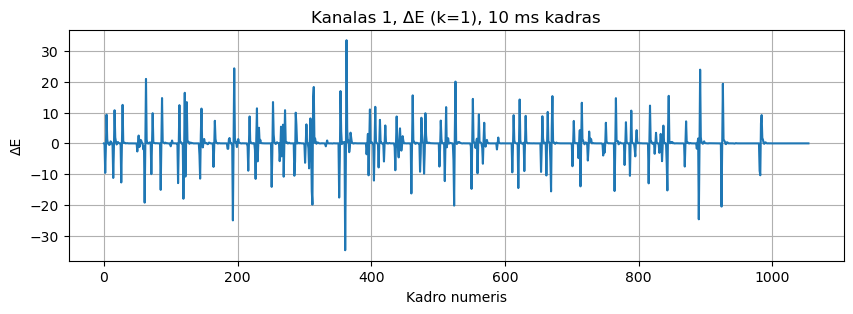

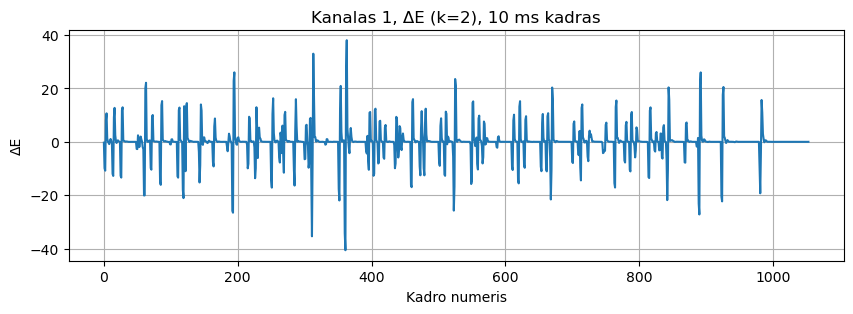

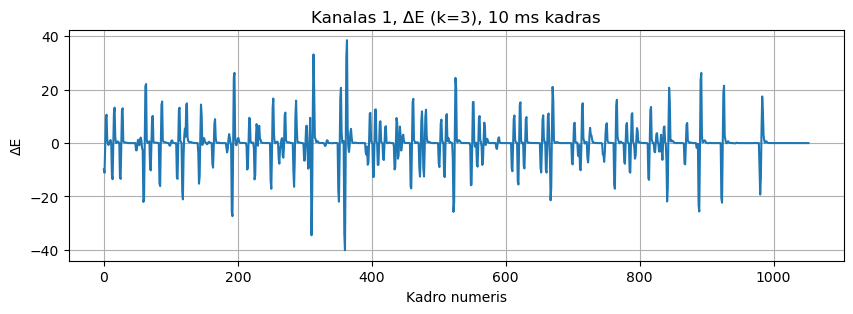

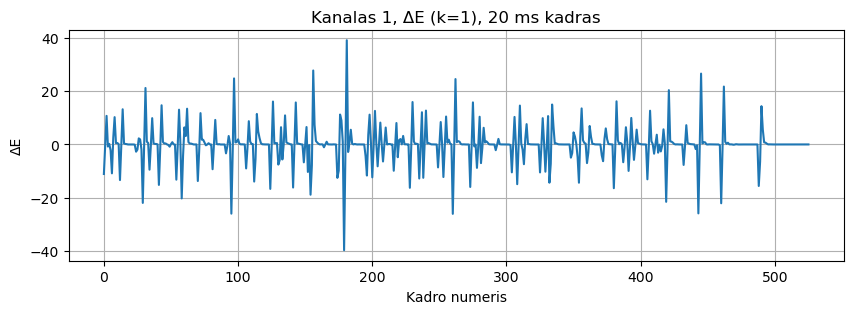

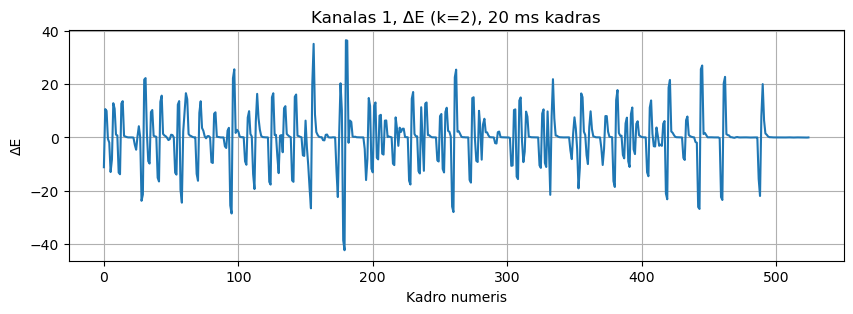

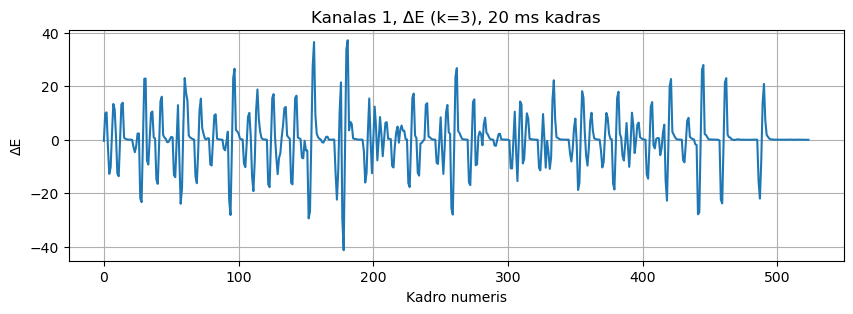

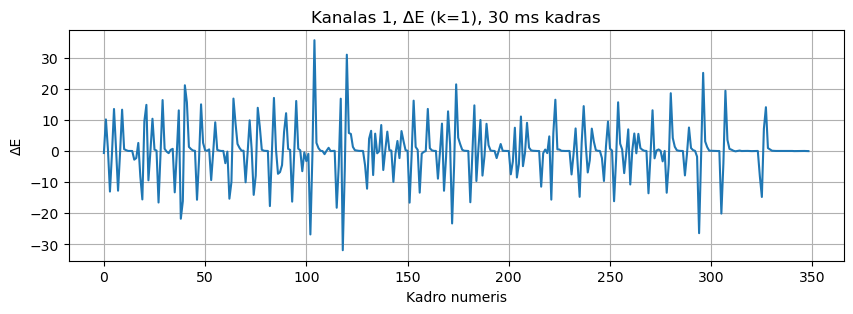

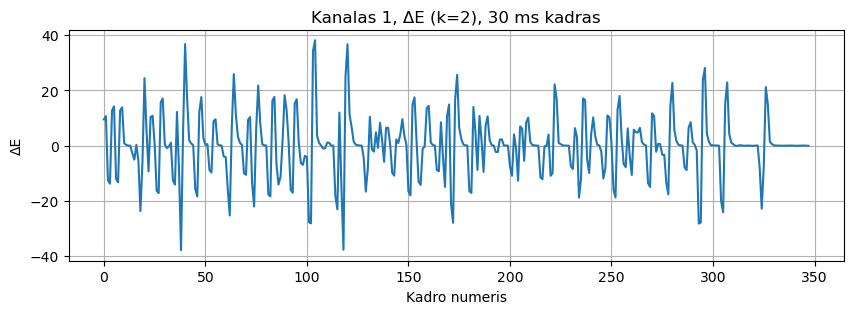

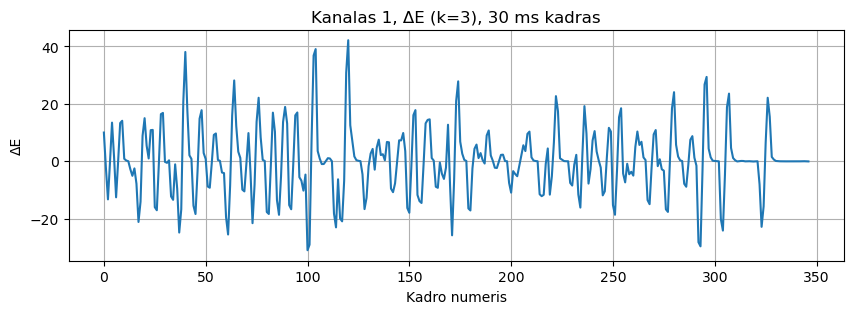

In [13]:
def delta_energy(E, k=1):
    d = np.full_like(E, np.nan)
    d[:len(E)-k] = E[:len(E)-k] - E[k:]
    return d
    
for ch in range(channels):    
    x = signal[:, ch]
    for fl in frame_lengths:
         # Energijos skaičiavimas
        frames = frame_signal(x, samplerate, fl, fl/2)
        E = frame_energy(frames)
        for k in [1,2,3]:
            dE = delta_energy(E, k)
            plot_delta_energy(dE, ch, fl, k)
            # plot_delta_energy(dE, ch, fl, k, samplerate)
